## 1. Podvig 

Na sliki so nadmorske višine (v dekametrih) na kvadratni mreži z neenakomernim desnim robom.

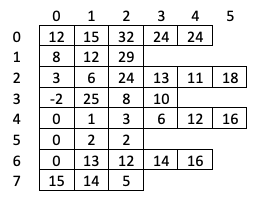

Višine predstavimo s seznamom različno dolgih seznamov.

In [1]:
visine = [
    [12, 15, 32, 24, 24],
    [ 8, 12, 29],
    [ 3,  6, 24, 13, 11, 18],
    [-2, 25,  8, 10],
    [ 0,  1,  3,  9, 12, 16],
    [ 0,  2,  2],
    [ 0, 13, 12, 14, 16],
    [15, 14, 5]]

Kolesar mora vedno goniti v klanec. V vsaki točki se razgleda v vse štiri smeri (^, >, v in <) in gre v tisto, v katero je klanec največji. Če je klanec enak v več smeri, ima ^ prednost pred >, > ima prednost pred v in v pred <. Če v nobeno smer ni klanca, temveč so vsa sosedna polja enako visoka kot trenutno ali celo nižja, obupano usede na tla, se zjoka in ostane, kjer je.

Napišite funkcijo `podvig(visine, x, y)`, ki prejme seznam višin in začetni koordinati kolesarja ter vrne končni koordinati.

Klic `podvig(visine, 0, 5)` vrne `(0, 7)`: šel bo > v v <. Klic `podvig(visine, 2, 3)` vrne `(1, 3)`: gre < in joka.

### Rešitev

Tole je bila naloga iz zank in pogojev. (Algoritmično ozadje pa lokalna optimizacija z gradientnim spustom oziroma, v tem primeru, dvigom).

Potrebovali bomo zanko `while`. Znotraj nje bomo vsakič poiskali polje, na katerega gre kolesar. Zanko ustavimo, ko se kolesar neha premikati.

Ena možnost je tale:

In [2]:
def podvig(visine, x, y):
    mx, my = x, y
    while True:
        for nx, ny in ((x, y - 1), (x + 1, y), (x, y + 1), (x - 1, y)):
            if 0 <= ny < len(visine) and 0 <= nx < len(visine[ny]) and visine[ny][nx] > visine[my][mx]:
                mx, my = nx, ny
        if mx == x  and my == y:
            return mx, my
        x, y = mx, my

V zanki imamo tri pare koordinat. V `x`, `y` shranimo koordinati, na katerih se nahaja kolesar; `mx`, `my` sta najboljši (doslej najdeni) koordinati sosednjega polja; `nx`, `ny` sta (znotraj zanke `for`) koordinati vseh sosednjih polj.

Na začetku zanke bosta `mx`, `my` trenutni koordinati - v začetku zato, ker ju tako nastavimo pred zanko, v vsakem naslednjem krogu zanke pa zato, ker `x`-u in `y`-u priredimo `mx` in `my`. Z zanko `for` gremo čez koordinate vseh sosednjih polj (v vrstnem redu, ki ga predpisuje naloga - gor, desno, dol, levo). Če naletimo na polje, ki je višje od trenutnega `mx`, `my`, v `mx` in `my` prepišemo koorindati tega polja. Če se v zanki `for` `mx` in `my` nista spremenila, se je kolesar ustavil in funkcija vrne rezultat.

Večina študentov se je lotila drugače: namesto zanke `for` so pisali kup `if`-ov in v vsakem `if`-u drugačen, zapleten pogoj. Takole je lažje: le za vsako polje `nx`, `ny` preverimo, da ima koordinati znotraj vrstic in vrstice.

**Fun fact** (da se boste naučili še kaj drugega): ko opisujemo razmike in robove v CSS, so jih naštevamo v enakem vrstnem redu kot tule: gor, desno, dol, levo. To si lahko zapomnimo po angleških Top, Right, Bottom, Left. Če si razvijalec spletnih aplikacij tega ne zapomni, ima TRouBLe.

## 2. Vrh

Kolesar iz drugega primera v prejšnji nalogi bi lahko šel ^ ^ ^ in prispel na 2, 0 z višino 32 (vendar tega ni storil, ker 25 > 24). Tako bi še vedno v vsakem koraku vozil v klanec (čeprav ne najhujšega) in se zjokal višje (na višini 32, ne 25).

Napišite funkcijo `vrh(visine, x, y)`, ki prejme začetni koordinati in višino ter vrne koordinati in višino najvišjega polja, ki ga kolesar lahko doseže, če vedno vozi navzgor. Klic `vrh(visine, 2, 3)` vrne `(2, 0, 32)`. Če je dosegljivih več enako visokih najvišjih polj, vrne poljubno od njih.

### Rešitev

To je, očitno naloga iz rekurzije. Tipično najkrajša naloga, študenti pa se je bojijo.

Zapomnimo si trenutne koordinate in višino. Nato gremo, tako kot prej, čez vsa sosednja polja. Za vsa, ki so (kar preverimo z enakim pogojem kot prej) višja od trenutnega, z rekurzivnim klicem ugotovimo, katero je najvišje polje, na katero lahko pridemo od njih. Če je le-to višje od trenutno najvišjega, si njegove koordinate in višino zapomnimo namesto trenutnih.

In [4]:
def vrh(visine, x, y):
    naj_v = x, y, visine[y][x]
    for nx, ny in ((x, y - 1), (x + 1, y), (x, y + 1), (x - 1, y)):
        if 0 <= ny < len(visine) and 0 <= nx < len(visine[ny]) and visine[ny][nx] > visine[y][x]:
            tam_v = vrh(visine, nx, ny)
            if tam_v[2] > naj_v[2]:
                naj_v = tam_v
    return naj_v

## 3. Aktivnosti

Tip ni le kolesar. En dan je tekel, kolesaril in igral badminton. Drug dan je samo tekel. Tretji dan je plaval, kolesaril in se sprehajal ... Aktivnosti si zapisuje v seznam množic; vsaka predstavlja en dan.

```
aktivnosti = [{"tek", "kolesarjenje", "badminton"},
              {"tek"},
              {"plavanje", "kolesarjenje", "sprehod"},
              {"tek", "plavanje", "sprehod"},
              {"tek", "kolesarjenje"},
              {"tek", "kolesarjenje"},
              {"plavanje", "sprehod"}]
```

Napišite naslednje funkcije.

- `vse_aktivnosti(aktivnosti)` vrne množico vseh aktivnosti, ki se pojavijo v seznamu.
- `naj_veriga(aktivnosti, aktivnost)` vrne najdaljše število zaporednih dni, v katerih se je ukvarjal s podano aktivnostjo. Tako `naj_veriga(aktivnosti, tek)` vrne `3`, ker je nekoč tekel tri dni zapored.
- `naj_aktivnost(aktivnosti)` vrne ime aktivnosti z najdaljšo verigo in dolžino verige, na primer `("tek", 3)`.

### Rešitev

Tole je bila naloga iz, hm, klasičnih vzorcev? Združevanja nekih množic, iskanja največjih elementov, najdaljših zaporedij. Se pravi, naloga za poceni točke, vsaj tako je bila mišljena.

`vse_aktivnosti` zahteva le, da izračunamo unijo seznama množic. Vesel bi bil rešitve

In [5]:
def vse_aktivnosti(aktivnosti):
    vse = set()
    for dnevne in aktivnosti:
        vse |= dnevne
    return vse

Še bolj bi bil vesel, če bi kdo (čeprav se nismo nikoli pogovarjali o tem, da `union` sprejme več argumentov) napisal kar

In [6]:
def vse_aktivnosti(aktivnosti):
    return set().union(*aktivnosti)

Žal pa je večina sploh pozabila na unijo in pisala

In [7]:
def vse_aktivnosti(aktivnosti):
    vse = set()
    for dnevne in aktivnosti:
        for aktivnost in dnevne:
            vse.add(aktivnost)
    return vse

`naj_veriga` ima trik, ki pa ga testi niso testirali, zato nisem zameril študentom, ki so (v bistvu) napisali napačno funkcijo.

Tole je ena od pravilnih različic:

In [8]:
def naj_veriga(aktivnosti, aktivnost):
    naj = 0
    veriga = 0
    for dan in aktivnosti:
        if aktivnost in dan:
            veriga += 1
            if veriga > naj:
                naj = veriga
        else:
            veriga = 0
    return naj

Gremo prek dni; če je aktivnost v množici tega dneva, podaljšamo verigo, sicer jo resetiramo na 0. In, ja, ko jo podaljšamo, mimogrede pogledamo, ali je daljša, kot je bila kdajkoli.

Na videz optimalnejša rešitev je napačna.

In [9]:
def naj_veriga(aktivnosti, aktivnost):
    naj = 0
    veriga = 0
    for dan in aktivnosti:
        if aktivnost in dan:
            veriga += 1
        else:
            if veriga > naj:
                naj = veriga
            veriga = 0
    return naj

Njen problem je v tem, da dolžino verige preverja le, ko se ta konča. Če najdaljša veriga obsega tudi zadnji dan, se `if veriga > naj` nikoli ne izvede.

Napako popravimo tako, da ponovimo `if` še po zanki.

In [10]:
def naj_veriga(aktivnosti, aktivnost):
    naj = 0
    veriga = 0
    for dan in aktivnosti:
        if aktivnost in dan:
            veriga += 1
        else:
            if veriga > naj:
                naj = veriga
            veriga = 0
    if veriga > naj:
        naj = veriga
    return naj

To ni preveč elegantno. Druga možnost je dodati fiktivni dan, da prekinemo morebitno najdaljšo verigo.

In [11]:
def naj_veriga(aktivnosti, aktivnost):
    naj = 0
    veriga = 0
    for dan in aktivnosti + [set()]:
        if aktivnost in dan:
            veriga += 1
        else:
            if veriga > naj:
                naj = veriga
            veriga = 0
    return naj

Profiji namesto seštevanja seznamov uporabijo `chain`. A pustimo.

S tema funkcijama smo si pripravili vse, kar potrebujemo za zadnji del: gremo čez vse aktivnost, za vsako poiščemo najdaljšo verigo in jo vrnemo.

In [12]:
def naj_aktivnost(aktivnosti):
    naj_akt = None
    naj_ver = None
    for aktivnost in vse_aktivnosti(aktivnosti):
        veriga = naj_veriga(aktivnosti, aktivnost)
        if naj_ver is None or veriga > naj_ver:
            naj_ver = veriga
            naj_akt = aktivnost
    return naj_akt, naj_ver

**Not so fun fact**: prvotno sem imel namen zastaviti le zadnjo nalogo, brez prvih dveh. Nato sem vendarle dodal še prvi dve, saj bi bila zadnja za večino najbrž pretežka. (Žal se je izkazalo, da je bila za mnoge pretežka tudi s prvima dvema.) Učinkovita rešitev brez prvih dveh funkcij je, da imamo slovar z dolžinami verig.

In [13]:
from collections import defaultdict

def naj_aktivnost(aktivnosti):
    verige = defaultdict(int)
    naj_akt = naj_ver = None
    for dan in aktivnosti:
        for aktivnost in dan:
            verige[aktivnost] += 1
            if naj_akt is None or verige[aktivnost] > naj_ver:
                naj_akt = aktivnost
                naj_ver = verige[aktivnost]
        for aktivnost in verige:
            if aktivnost not in dan:
                verige[aktivnost] = 0
    return naj_akt, naj_ver

Malo profesionalnejša verzija istega (za tiste, ki jih zanima) je

In [15]:
from itertools import chain

def naj_aktivnost(aktivnosti):
    verige = {}
    naj_ver, naj_akt = 0, ""
    for dan in aktivnosti:
        verige = {aktivnost: 1 + verige.get(aktivnost, 0) for aktivnost in dan}
        naj_ver, naj_akt = max(chain([(naj_ver, naj_akt)],
                                     ((ver, akt) for akt, ver in verige.items())))
    return naj_akt, naj_ver

## 4. Seznam

V resnici si zapiskov ne dela v seznam temveč v datoteko, katere oblika je takšna.

```
TKB
T
PKS
TPS
TK
TK
PS
---
T=tek
K=kolesarjenje
B=badminton
P=plavanje
S=sprehod
```

V prvem delu ustreza vsaka vrstica enemu dnevu; črke predstavljajo aktivnosti tega dneva. Sledi vrstica s tremi minusi, tej pa sledijo vrstice, ki povedo, katera črka pomeni katero aktivnost.  V različnih datotekah lahko črke pomenijo različne aktivnosti.

Napišite funkcijo `preberi_aktivnosti(ime_datoteke)`, ki prejme ime datoteke v takšni obliki in vrne seznam v obliki iz prejšnje naloge. 

Primera datotek se pojavita ob prvem zagonu testov.

### Rešitev

Tole je več kot očitno vaja iz branja datotek in razkosavanja nizov. Ker je oboje precej enostavno (samo `for vrstica in open(ime_datoteke)` in en `split`), je zraven so aktivnosti predstavljene s črkami, tako da v isti nalogi spet ponovimo sezname, množice in slovarje. Poleg tega pa sem vas zafrknil še s tem, da sem dal ključe za (in ne pred) aktivnosti.

Prvo, kar moramo uvideti, je, da bomo morali sestaviti slovar ključev; v bistvu tole:

```
kljuci = {}
for vrstica in open(ime_datoteke):
    kljuc, akt = vrstica.strip().split("=")
    kljuci[kljuc] = akt
```

Ker so ključi za `---`, pa moramo prej preskočiti vse do `---`. To najpreprosteje stori ta, ki se spomni, da se datoteka bere le od tam najprej, do koder smo jo že prebrali.

```
kljuci = {}
f = open(ime_datoteke)
for vrstica in f:
    if vrstica == "---\n":
        break
for vrstica in f:
    kljuc, akt = vrstica.strip().split("=")
    kljuci[kljuc] = akt
```

Pregledovanje je že za mano; ne spomnim se, ali se je kdo domislil tega trika. Večina je imela "zastavico" (boolovo spremenljivko), v katero so si zabeležili, ali so že videli `---` ali ne.

```
beremo_kljuce = False
kljuci = {}
for vrstica in open(ime_datoteke):
    if beremo_kljuce:
        kljuc, akt = vrstica.strip().split("=")
        kljuci[kljuc] = akt
    elif vrstica == "---\n":
        beremo_kljuce = True
```

Da, lahko tudi tako.

Po tem, ko imamo ključe, preprosto ponovno beremo datoteko od začetka in gradimo seznam, ki ga moramo vrniti.

Celotna rešitev je torej:

In [16]:
def preberi_aktivnosti(ime_datoteke):
    kljuci = {}
    f = open(ime_datoteke)
    for vrstica in f:
        if vrstica == "---\n":
            break
    for vrstica in f:
        kljuc, akt = vrstica.strip().split("=")
        kljuci[kljuc] = akt

    aktivnosti = []
    for vrstica in open(ime_datoteke):
        dan = set()
        if vrstica == "---\n":
            break
        for kljuc in vrstica.strip():
            dan.add(kljuci[kljuc])
        aktivnosti.append(dan)
    return aktivnosti

Ta funkcija vsebuje tri zanke in gre dvakrat čez datoteko. Nekaterim se je to zdelo potratno, zato so šli čez datoteko le enkrat in si do takrat, ko so naleteli na vrstico z minusi, shranjevali vse vrstice, ki so jih videli, v seznam. Tudi prav.

Nekateri so prebrali vse vrstice v seznam in poiskali tisto s tremi minusi (v slogu `minusi = vrstice.index("---\n")`, ali `minusi = vrstice.index("---")`, odvisno od tega, kako so jih brali). Nato so šli čez vse vrstice za to vrstico (`vrstice[minusi + 1:]`), da so razbrali ključe in potem še čez vse vrstice pred njo (`vrstice[:minusi]`), da so sestavili seznam. Da, lahko tudi tako.

A še smo že na tej poti, je bolj zabavno prebrati celo datoteko v niz in jo razdeliti glede na `---\n`.

In [17]:
def preberi_aktivnosti(ime_datoteke):
    dnevi, slovar = open(ime_datoteke).read().split("---\n")
    kljuci = {}
    for vrstica in slovar.splitlines():
        kljuc, akt = vrstica.strip().split("=")
        kljuci[kljuc] = akt
    aktivnosti = []
    for vrstica in dnevi.splitlines():
        dan = set()
        for kljuc in vrstica.strip():
            dan.add(kljuci[kljuc])
        aktivnosti.append(dan)
    return aktivnosti

Metoda `splitlines()` je ekvivalentna `split("\n")`.

To nas hitro pripelje do precej krajše rešitve.

In [18]:
def preberi_aktivnosti(ime_datoteke):
    aktivnosti, slovar = open(ime_datoteke).read().split("---\n")
    slovar = {vrstica[0]: vrstica[2:].strip() for vrstica in slovar.splitlines()}
    return [{slovar[c] for c in vrstica.strip()} for vrstica in aktivnosti.splitlines()]

## 5. Spomeniki

Napišite razred `Spomeniki` s primernim konstruktorjem brez argumentov in naslednjimi metodami.

- `obisci(kolesar, spomenik)` zabeleži, da je kolesar obiskal "spomenik", npr. `obisci("Ana", "Vršič")`. Metoda vrne `True`, če je to prvi obisk tega spomenika in `False`, če je bil ta spomenik že kdaj obiskan (s strani tega ali kakega drugega kolesarja).
- `obiskanost(spomenik)` vrne število različnih kolesarjev, ki so obiskali podani spomenik.
- `spomenikov(kolesar)` vrne število različnih spomenikov, ki jih je obiskal podani kolesar.
- `prvaki()` vrne slovar, katerega ključi so imena spomenikov, pripadajoča vrednost pa ime prvega kolesarja, ki je obiskal ta spomenik.

Testi vsebujejo jasen primer.

### Rešitev

Kot vedno v objektnem programiranju (ali pa vsaj v izpitnih nalogah na to temo), je delo končano, ko ugotovimo, kakšne atribute bomo potrebovali. Ko to vemo, je potrebno samo še sprogramirati; metode, ki jih pišemo v tej nalogi so tipično zelo kratke in preproste.

Ko sem zastavil nalogo, sem imel v mislih določeno rešitev. Po izpitu sem zaupal nalogo hišnemu brucu iz univerzitetnega študija, pa je trenutek pomislil in rekel, da potrebuješ samo slovar, katerega ključi so spomeniki, vrednosti pa seznami kolesarjev. (Ker v Pythonu ni tako domač kot v Javascriptu, Javi in (sram naju je priznati) Phpju, me je nato vprašal še, če množice v Pythonu ne ohranjajo vrstnega reda. Ne, ne ohranjajo ga.)

Da, natančno takšen slovar je najpreprostejša rešitev naloge.

- Konstruktor bo le pripravil prazen slovar.
- Metoda `obisci` bo preverila, ali že vemo za ta spomenik. Če še ne, ga doda, s tem kolesarjem kot seznamom obiskovalcev, in vrne `True`. Sicer preveri ali je ta kolesar prvič na tem spomeniku in ga doda. Na koncu vrne `False`.
- Metoda `obiskanost` vrne dolžino seznama kolesarjev, ki pripadajo temu ključu.
- Metoda `spomenikov` vrne število seznamov, ki vsebujejo tega kolesarja.
- Metoda `prvaki` pripravi slovar, podoben atributu `spomeniki`, vendar namesto seznamov vsebuje le prvi element seznama.

Torej:

In [19]:
class Spomeniki:
    def __init__(self):
        self.spomeniki = {}

    def obisci(self, kolesar, spomenik):
        if spomenik not in self.spomeniki:
            self.spomeniki[spomenik] = [kolesar]
            return True

        if kolesar not in self.spomeniki[spomenik]:
            self.spomeniki[spomenik].append(kolesar)
        return False

    def obiskanost(self, spomenik):
        return len(self.spomeniki.get(spomenik, []))

    def spomenikov(self, kolesar):
        return sum(kolesar in obiskovalci for obiskovalci in self.spomeniki.values())

    def prvaki(self):
        return {spomenik: obiskovalci[0] for spomenik, obiskovalci in self.spomeniki.items()}

Ali, če imate raje daljše rešitve

In [20]:
class Spomeniki:
    def __init__(self):
        self.spomeniki = {}

    def obisci(self, kolesar, spomenik):
        if spomenik not in self.spomeniki:
            self.spomeniki[spomenik] = [kolesar]
            return True

        if kolesar not in self.spomeniki[spomenik]:
            self.spomeniki[spomenik].append(kolesar)
        return False

    def obiskanost(self, spomenik):
        if spomenik not in self.spomeniki:
            return 0
        return len(self.spomeniki[spomenik])

    def spomenikov(self, kolesar):
        obiskanih = 0
        for obiskovalci in self.spomeniki.values():
            if kolesar in obiskovalci:
                obiskanih += 1
        return obiskanih

    def prvaki(self):
        prvi = {}
        for spomenik, obiskovalci in self.spomeniki.items():
            prvi[spomenik] = obiskovalci[0]
        return prvi